Nash equilibrium for multi agent optimal sell in Almgren and Chriss market impact model
==
$\Sigma(t) = \sum^n_{i=1} X^*_i(t)$

where: 

- n : number of agents
- $X^*_i(t)$ : optimal inventory holding for each agent at time t
- $\Sigma(t)$ : sum of the optimal inventories (total volume traded by the agents)

Closed form nash equilibrium  in this case is:

$$ \Sigma(t) = \frac{n \bar{x}_n}{2\sinh{(\hat{\rho}\,\, T)}} \left(  e^{\hat{\rho}\,\, T}e^{\rho_{-}\,\,t} - e^{-\hat{\rho}\,\, T } e^{\rho_{+}\,\, t}  \right) $$

where:

- $\hat{\rho} = \frac{\sqrt{(n-1)^2\gamma^2 + 4(n+1)\alpha\sigma^2\lambda}} {2(n+1)\lambda}$
- T : number of steps in the time window
- $\rho_{\pm} = - \frac{(n-1)\gamma}{2(n+1)\lambda} \pm \hat{\rho}$
- $\lambda$ : temporary impact
- $\gamma$ : permanent impact
- $\sigma$ : volatility of the asset
- $\alpha$ : risk aversion for CARA utility

Here it is assumed that the market model is Almgren-Chriss, thus no buy actions in a selling program.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as m

def heat_v(states):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df = df.fillna(-1)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]
    sns.heatmap(z, cmap="YlGnBu")
    plt.xlabel('Time')
    plt.ylabel('Inventory') 
    plt.title('Heatmap of the average action per inventory and time step')
    plt.show()

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = min#np.min(matrix, axis=0)#np.min(data)#
    max_vals = max#np.max(matrix, axis=0)#np.max(data)#
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):

    n = 101
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(0,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 7))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    #ns.heatmap(z, cmap=cmap)
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#
            #for h in range(len(q)):
            #    rect = plt.Rectangle((h, int(q[h])), 1, 1, fill=None, edgecolor='red', linewidth=1)
            #    ax.add_patch(rect)   
    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()
    
def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

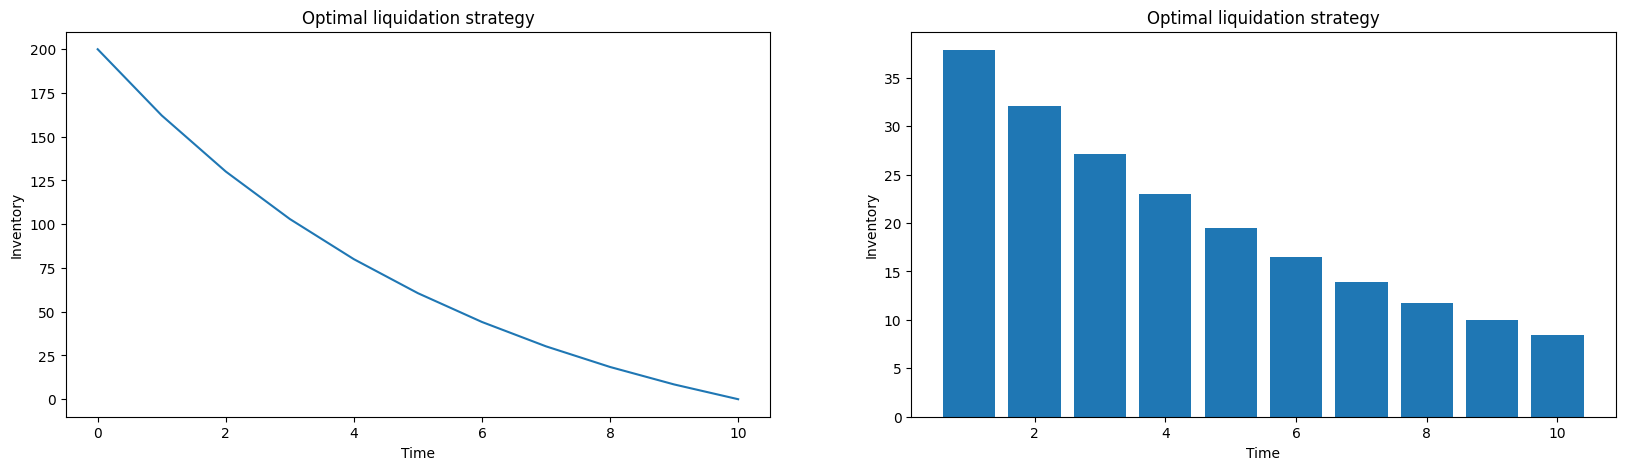

Theoretical agents mean, stddev, median respectively: 27.311627481917185 0.00255807112005712 27.311632680439743


In [2]:
q_0 = 100
T = 10
gamma = 0.001 # permanent impact k
lambd = 0.002 # temporary impact a
alpha = 1e-9 # risk aversion 
sigma = 0.00001 # volatility 
theta_hat = np.sqrt(gamma**2 + 4*alpha*sigma**2*lambd)/(2*lambd)
rho_hat = np.sqrt(gamma**2+12*alpha*sigma**2*lambd)/(6*lambd)
rho_plus = -gamma/(6*lambd) + rho_hat
rho_minus = -gamma/(6*lambd) - rho_hat
a = [q_0 * 2,]
for i in range(1,T+1):
    a.append((q_0 * 2)/(2*m.sinh(rho_hat*T)) * (m.exp(rho_hat * T) * m.exp(rho_minus*i) - m.exp(-rho_hat * T) * m.exp(rho_plus*i)))

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(np.asarray(a))
axs[0].set_title('Optimal liquidation strategy')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Inventory')
axs[1].bar(range(1,T+1),abs(np.diff(a)))
axs[1].set_title('Optimal liquidation strategy')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Inventory')
plt.show()

'''Implementation Shortfalls'''
dati = dict(np.load('C:/Users/macri/Desktop/qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/dati.npz', allow_pickle=True)) # theo qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/
dati = dati['arr_0'][:,0]
at = []
azioni = abs(np.diff(np.asarray(a)))
for i in range(dati.reshape(-1,10).shape[0]):
    at.append(dati.reshape(-1,10)[i]* azioni - 0.002 * azioni**2)

theo_agents = np.sum((np.asarray(at)),axis=1)
theo_agents_std = np.sum((np.asarray(at)),axis=1).std()
print('Theoretical agents mean, stddev, median respectively:', (q_0*10*2 - theo_agents.mean()), theo_agents_std, q_0*10*2 - np.median(theo_agents))
#((q_0*10*2) - theo_agents).mean(), theo_agents_std, np.median((q_0*10*2) - theo_agents)

Constrained Agents
==
Agents that can only sell to unwind initial position

Results with Q,T,S as features to the RL algorithm

In [3]:
'''Implementation Shortfalls'''
dati =  dict(np.load('qtp_multi_int_for_reward_study/cons/dati.npz', allow_pickle=True)) # non unc
azioni =  dict(np.load('qtp_multi_int_for_reward_study/cons/azioni.npz', allow_pickle=True))

dati = dati['arr_0'][:,0]
azioni1 = azioni['arr_0'][0]#.mean(axis=1)
azioni2 = azioni['arr_0'][1]#.mean(axis=1)
azioni = (azioni1 + azioni2) 
iss = []

for i in range(dati.reshape(-1,10).shape[0]):
    iss.append((dati.reshape(-1,10)[i])* azioni[:,i] - 0.002 * azioni[:,i]**2)
agents = np.sum((np.asarray(iss)),axis=1)
agents_std = np.sum((np.asarray(iss)),axis=1).std()
print('media IS degli agenti =',  2000 - agents.mean())
print('mediana IS degli agenti =',2000 - np.median(agents))
print('stddev IS degli agenti =',agents_std)
dpel_unc = (agents - theo_agents)/theo_agents
print('media D P&L degli agenti =', dpel_unc.mean())
print('stddev D P&L degli agenti =', dpel_unc.std())

media IS degli agenti = 27.423134679270106
mediana IS degli agenti = 27.495015387846706
stddev IS degli agenti = 0.4601163395015857
media D P&L degli agenti = -5.6525500202404147e-05
stddev D P&L degli agenti = 0.0002332404672276294


''

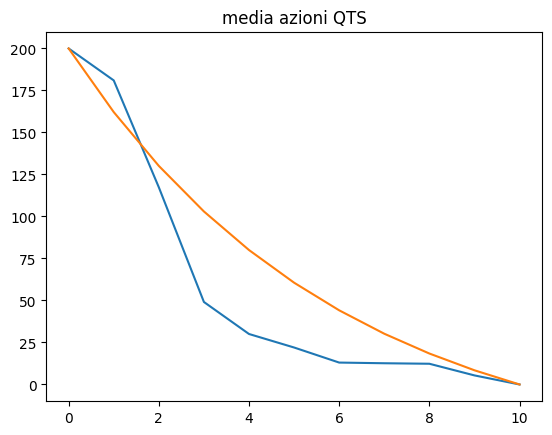

In [4]:
'''Somma inventari per volumi totali tradati da etramboi gli agenti'''
azioni = dict(np.load('qtp_multi_int_for_reward_study/cons/azioni.npz', allow_pickle=True))

azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
q0 = np.zeros(11) 
q0[0] = q_0 * 2
for i in range(1,10):
    q0[i] =  q0[i - 1] - azioni[i - 1]

azioni_tw = np.ones((5_000,10)) * 2
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = q_0 * 2
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

plt.plot(q0)
plt.plot(np.asarray(a))

plt.title('media azioni QTS')
;

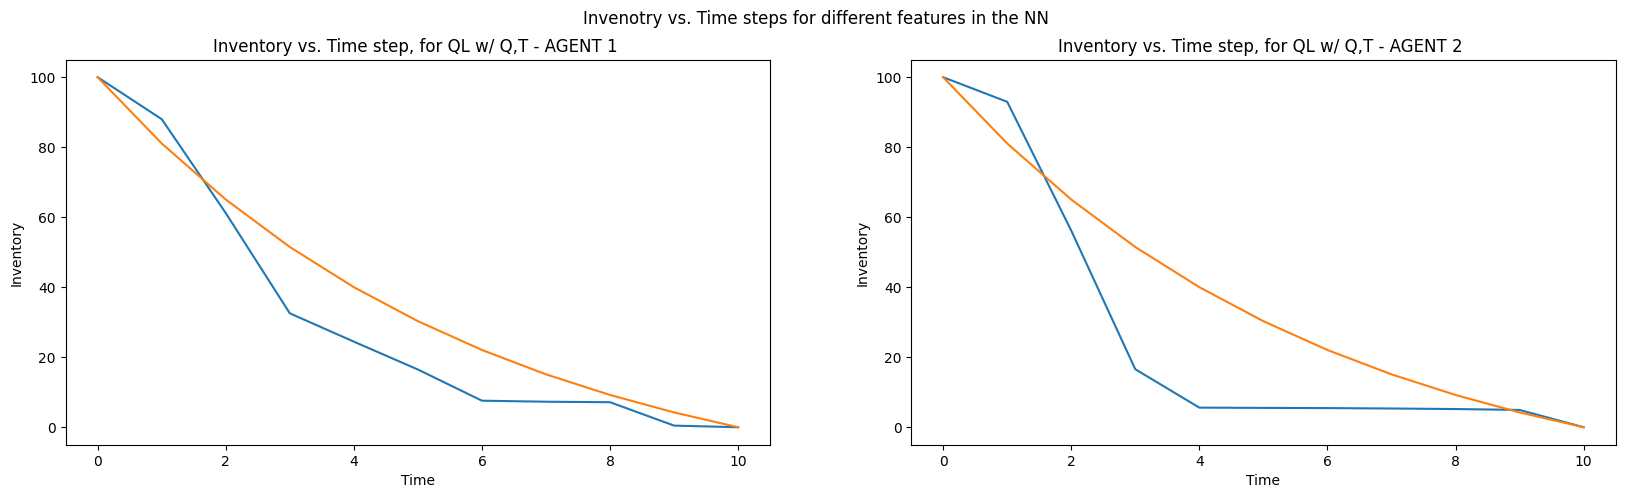

In [5]:
'''Livelli di Inventario'''
INV = 100
azioni = dict(np.load('qtp_multi_int_for_reward_study/cons/azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 10
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]
b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1 ')

axs[1].plot(q)
axs[1].plot(b)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 2 ')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

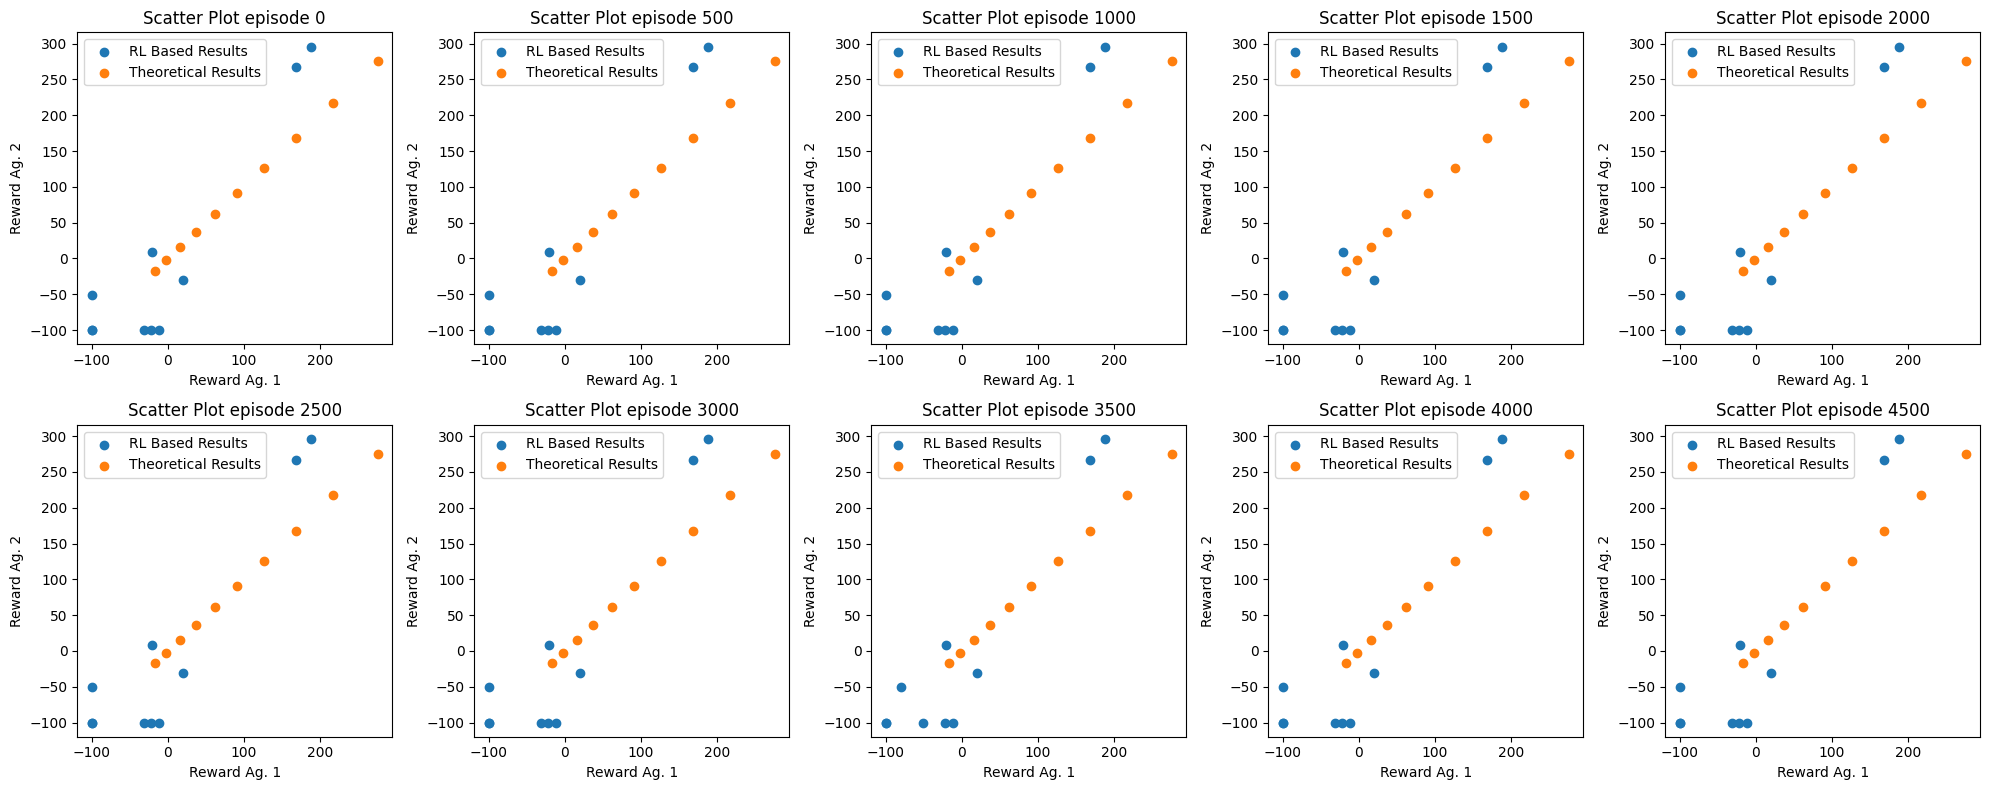

In [6]:
'''Rewards per time steps per entrambi gli agenti'''

# Load data
rewards = dict(np.load('qtp_multi_int_for_reward_study/cons//re.npz', allow_pickle=True))
rewards_sch = dict(np.load('qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/re.npz', allow_pickle=True))
rewards_0 = rewards['arr_0'][0]
rewards_1 = rewards['arr_0'][1]

# Time steps to plot
time_steps_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

# Create figure and subplots
fig, axs = plt.subplots(2, len(time_steps_to_plot)//2, figsize=(20, 8))

# Plot scatter plots for specified time steps
for i, time_step in enumerate(time_steps_to_plot):
    row = i // (len(time_steps_to_plot)//2)
    col = i % (len(time_steps_to_plot)//2)
    ax = axs[row, col]
    ax.scatter(rewards_0[:, time_step], rewards_1[:, time_step], label='RL Based Results')
    ax.scatter(rewards_sch['arr_0'][0][:, time_step], rewards_sch['arr_0'][1][:, time_step], label='Theoretical Results')
    ax.set_xlabel('Reward Ag. 1')
    ax.set_ylabel('Reward Ag. 2')
    ax.set_title(f'Scatter Plot episode {time_step}')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
'''Coefficiente di correlazione tra i rewards per entrambi gli agenti'''
print('Agenti RL constrained: \n', np.corrcoef(rewards['arr_0'][0].flatten(), rewards['arr_0'][1].flatten()))
print('Agenti teorici: \n',np.corrcoef(rewards_sch['arr_0'][0].flatten(), rewards_sch['arr_0'][1].flatten()))

Agenti RL constrained: 
 [[1.        0.9069163]
 [0.9069163 1.       ]]
Agenti teorici: 
 [[1. 1.]
 [1. 1.]]


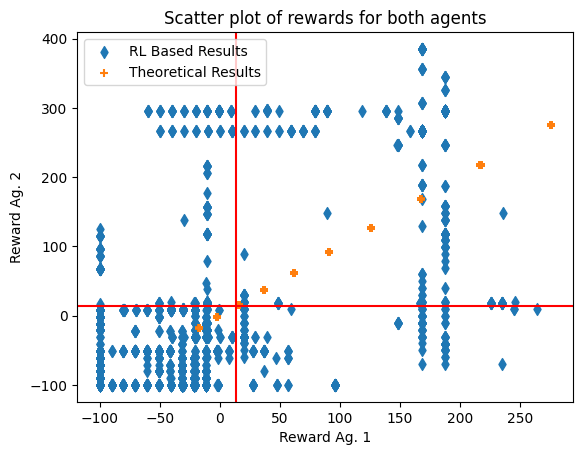

In [8]:
'''Rewards totali per entrambi gli agenti'''
rewards = dict(np.load('qtp_multi_int_for_reward_study/cons/re.npz', allow_pickle=True))
plt.scatter(rewards['arr_0'][0].flatten()    , rewards['arr_0'][1].flatten()   , marker = 'd', label = 'RL Based Results')
plt.scatter(rewards_sch['arr_0'][0].flatten(), rewards_sch['arr_0'][1].flatten(), marker = '+', label = 'Theoretical Results')
plt.title('Scatter plot of rewards for both agents')
plt.legend()
plt.xlabel('Reward Ag. 1')
plt.ylabel('Reward Ag. 2')
plt.axvline(27/2,0, color = 'r')
plt.axhline(27/2,0, color = 'r');

Agent 1:


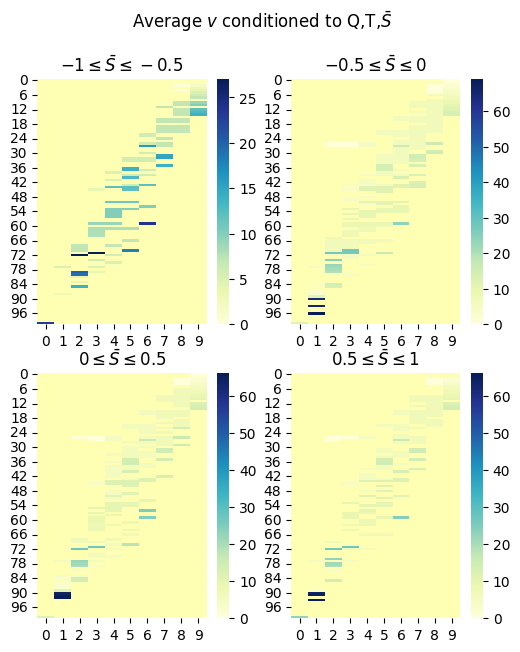

Agent 2:


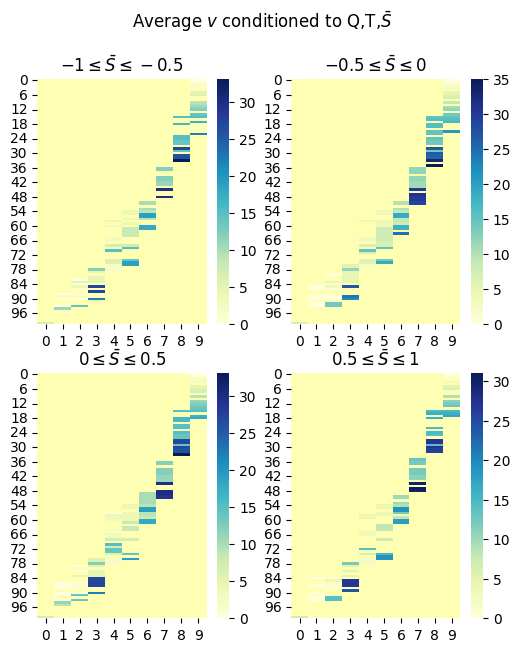

In [9]:
'''Heatmaps delle Azioni per livelli di inventario e di tempo e prezzo normalizzato'''
dati = dict(np.load('qtp_multi_int_for_reward_study/cons/perAz/dati.npz', allow_pickle=True))
dati = dati['arr_0']
stati = dict(np.load('qtp_multi_int_for_reward_study/cons/perAz/stati.npz', allow_pickle=True))
stati = stati['arr_0']
stati[0].shape
agente1 = stati[0]
agente2 = stati[1]
agente1[:,1] = agente1[:,0] #- 1
agente2[:,1] = agente2[:,0] #- 1
print('Agent 1:')
heatAct(agente1.reshape(-1,4), dati.min(), dati.max())
print('Agent 2:')
heatAct(agente2.reshape(-1,4), dati.min(), dati.max())

Unconstrained Agents
==
Agents that can both buy and sell to unwind initial position, their invenotry is always bind as $q_t\in\left[0, q_0\right]$

Results with Q,T,S as features to the RL algorithm

In [10]:
'''Implementation Shortfalls'''
dati =  dict(np.load('qtp_multi_int_for_reward_study/unc/dati.npz', allow_pickle=True)) # unc
azioni =  dict(np.load('qtp_multi_int_for_reward_study/unc/azioni.npz', allow_pickle=True))

dati = dati['arr_0'][:,0]
azioni1 = azioni['arr_0'][0]#.mean(axis=1)
azioni2 = azioni['arr_0'][1]#.mean(axis=1)
azioni = (azioni1 + azioni2) 
iss = []

for i in range(dati.reshape(-1,10).shape[0]):
    iss.append((dati.reshape(-1,10)[i])* azioni[:,i] - 0.002 * azioni[:,i]**2)
    
agents = np.sum((np.asarray(iss)),axis=1)
agents_std = np.sum((np.asarray(iss)),axis=1).std()
print('media IS degli agenti =',  2000 - agents.mean())
print('mediana IS degli agenti =',2000 - np.median(agents))
print('stddev IS degli agenti =',agents_std)
dpel_unc = (agents - theo_agents)/theo_agents
print('meadia D P&L degli agenti =', dpel_unc.mean())
print('stddev D P&L degli agenti =', dpel_unc.std())

media IS degli agenti = 24.184619429279792
mediana IS degli agenti = 24.099046337035816
stddev IS degli agenti = 1.0005825486996274
meadia D P&L degli agenti = 0.0015851505416667982
stddev D P&L degli agenti = 0.0005072058745171625


''

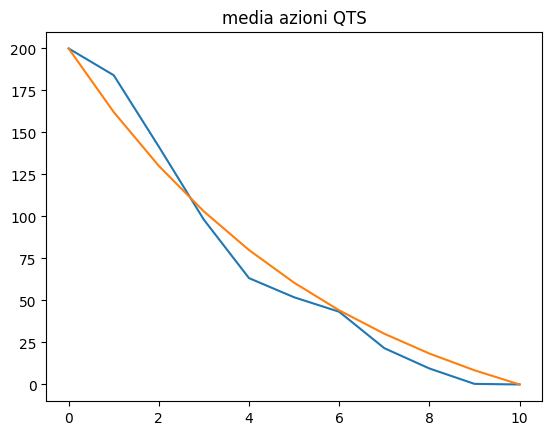

In [11]:
'''Somma inventari per volumi totali tradati da etrambi gli agenti'''
azioni = dict(np.load('qtp_multi_int_for_reward_study/unc//azioni.npz', allow_pickle=True))

azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
q0 = np.zeros(11) 
q0[0] = q_0 * 2
for i in range(1,10):
    q0[i] =  q0[i - 1] - azioni[i - 1]

azioni_tw = np.ones((5_000,10)) * 2
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = q_0 * 2
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

plt.plot(q0)
plt.plot(np.asarray(a))

plt.title('media azioni QTS')
;

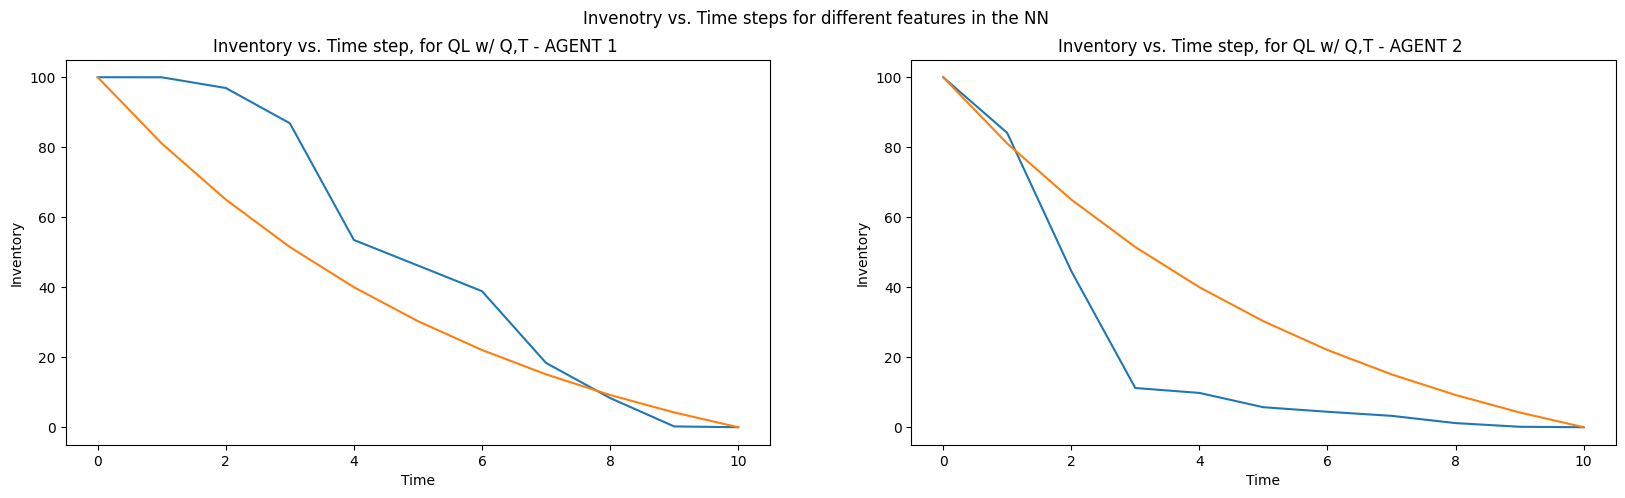

In [12]:
'''Livelli di Inventario per singoli agenti'''
INV = 100
azioni = dict(np.load('qtp_multi_int_for_reward_study/unc//azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(11) 
q0[0] = INV
for i in range(1,10):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(11) 
q[0] = INV
for i in range(1,10):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,10)) * 10
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = INV
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]
b = np.asarray(a)/2

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1 ')

axs[1].plot(q)
axs[1].plot(b)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 2 ')

fig.suptitle('Invenotry vs. Time steps for different features in the NN')


plt.show()

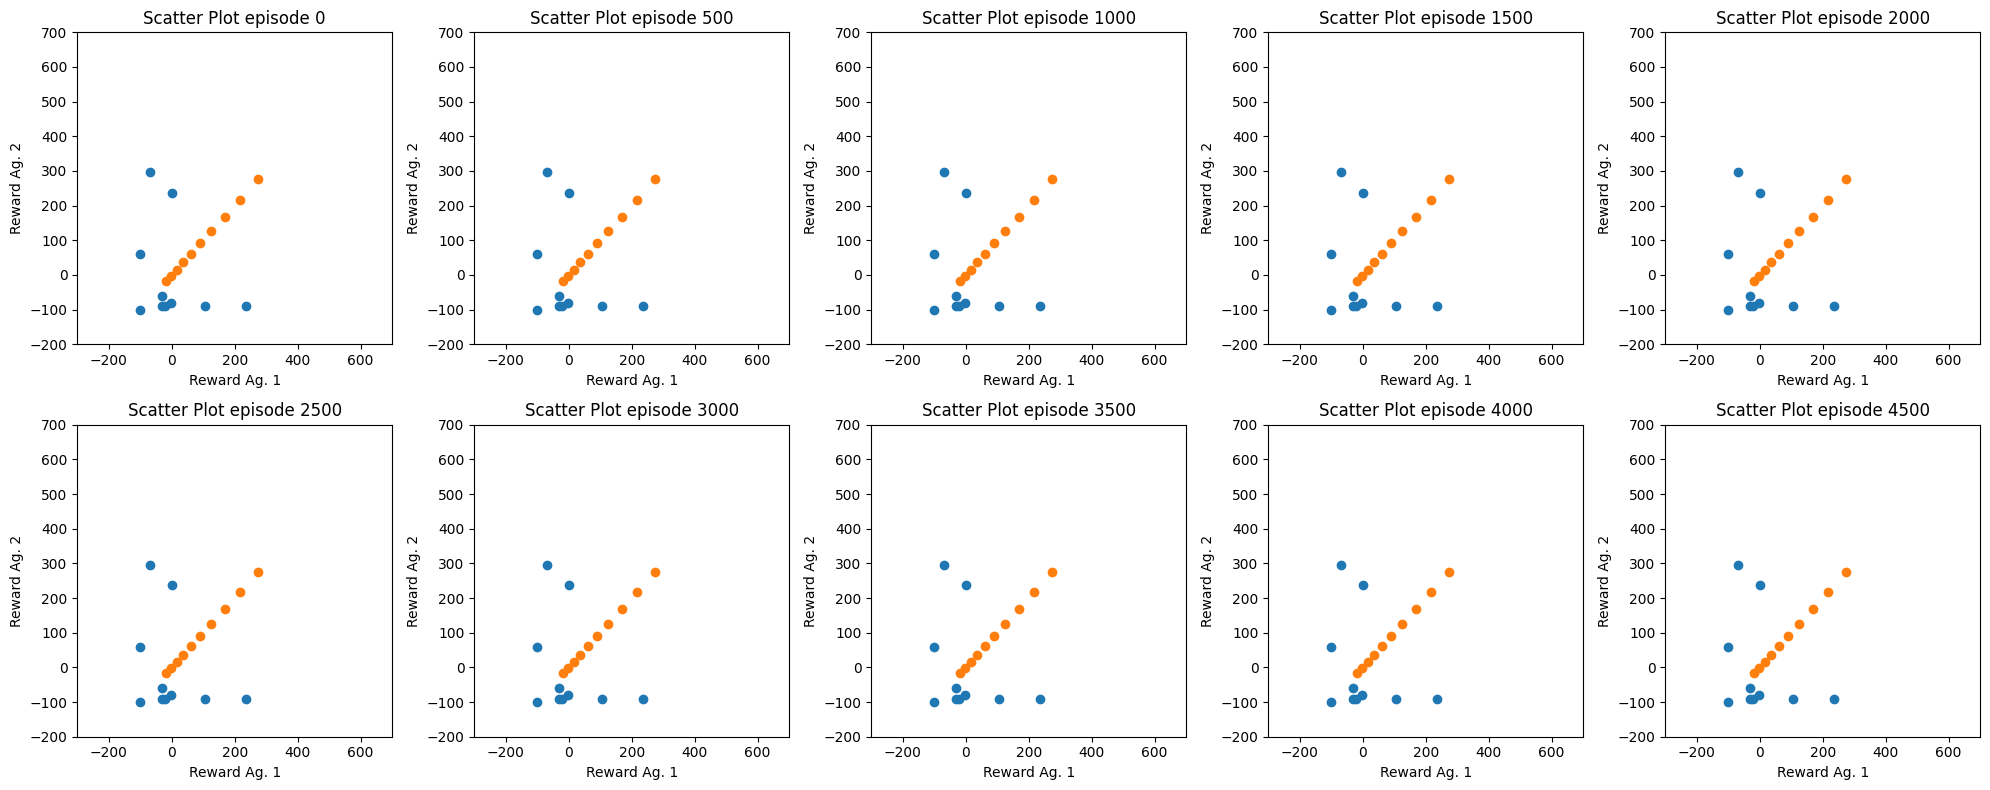

In [13]:
'''Rewards per time steps per entrambi gli agenti'''
# Load rewards data
# Load rewards data
rewards = dict(np.load('qtp_multi_int_for_reward_study/unc/re.npz', allow_pickle=True))
rewards_0 = rewards['arr_0'][0]
rewards_1 = rewards['arr_0'][1]

# Time steps to plot
time_steps_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

# Create figure and subplots
fig, axs = plt.subplots(2, len(time_steps_to_plot)//2, figsize=(20, 8))

# Store all data points in lists
all_rewards_0 = []
all_rewards_1 = []

# Plot scatter plots for specified time steps
for i, time_step in enumerate(time_steps_to_plot):
    row = i // (len(time_steps_to_plot)//2)
    col = i % (len(time_steps_to_plot)//2)
    ax = axs[row, col]
    ax.scatter(rewards_0[:, time_step], rewards_1[:, time_step])
    ax.scatter(rewards_sch['arr_0'][0][:, time_step], rewards_sch['arr_0'][1][:, time_step])
    ax.set_xlabel('Reward Ag. 1')
    ax.set_ylabel('Reward Ag. 2')
    ax.set_title(f'Scatter Plot episode {time_step}')
    
    # Store all data points
    all_rewards_0.extend(rewards_0[:, time_step])
    all_rewards_1.extend(rewards_1[:, time_step])

# Determine the range for x and y axes
x_min = min(min(all_rewards_0), min(all_rewards_1))
x_max = max(max(all_rewards_0), max(all_rewards_1))
y_min = x_min  # Assuming the same scale for y-axis
y_max = x_max  # Assuming the same scale for y-axis

# Set the same x-axis and y-axis limits for all subplots
for ax in axs.flat:
    ax.set_xlim(-300, 700)
    ax.set_ylim(-200, 700)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
'''Coefficiente di correlazione tra i rewards per entrambi gli agenti'''
print('Agenti RL constrained: \n', np.corrcoef(rewards['arr_0'][0].flatten(), rewards['arr_0'][1].flatten()))
print('Agenti teorici: \n',np.corrcoef(rewards_sch['arr_0'][0].flatten(), rewards_sch['arr_0'][1].flatten()))

Agenti RL constrained: 
 [[ 1.         -0.28499758]
 [-0.28499758  1.        ]]
Agenti teorici: 
 [[1. 1.]
 [1. 1.]]


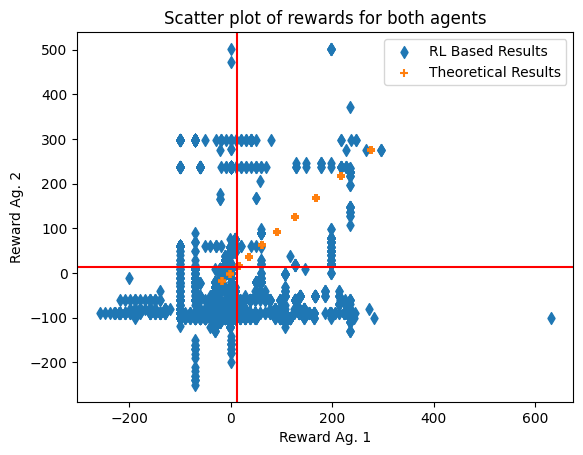

In [15]:
'''Rewards totali per entrambi gli agenti'''
rewards = dict(np.load('qtp_multi_int_for_reward_study/unc//re.npz', allow_pickle=True))
plt.scatter(rewards['arr_0'][0].flatten()    , rewards['arr_0'][1].flatten()   , marker = 'd', label = 'RL Based Results')
plt.scatter(rewards_sch['arr_0'][0].flatten(), rewards_sch['arr_0'][1].flatten(), marker = '+', label = 'Theoretical Results')
plt.title('Scatter plot of rewards for both agents')
plt.legend()
plt.xlabel('Reward Ag. 1')
plt.ylabel('Reward Ag. 2')
plt.axvline(25.0076/2,0, color = 'r')
plt.axhline(25.0076/2,0, color = 'r');

Agent 1:


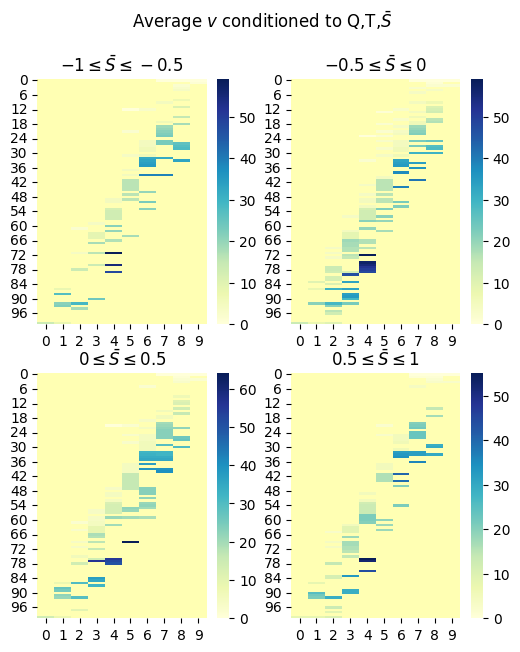

Agent 2:


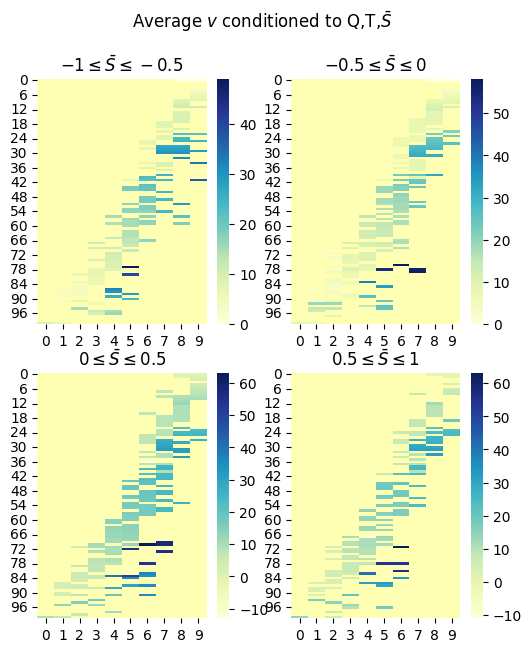

In [16]:
'''Heatmaps delle Azioni per livelli di inventario e di tempo e prezzo normalizzato'''
dati = dict(np.load('qtp_multi_int_for_reward_study/unc/perAz/dati.npz', allow_pickle=True))
dati = dati['arr_0']
stati = dict(np.load('qtp_multi_int_for_reward_study/unc/perAz/stati.npz', allow_pickle=True))
stati = stati['arr_0']
stati[0].shape
agente1 = stati[0]
agente2 = stati[1]
agente1[:,1] = agente1[:,0] #- 1
agente2[:,1] = agente2[:,0] #- 1
print('Agent 1:')
heatAct(agente1.reshape(-1,4), dati.min(), dati.max())
print('Agent 2:')
heatAct(agente2.reshape(-1,4), dati.min(), dati.max())

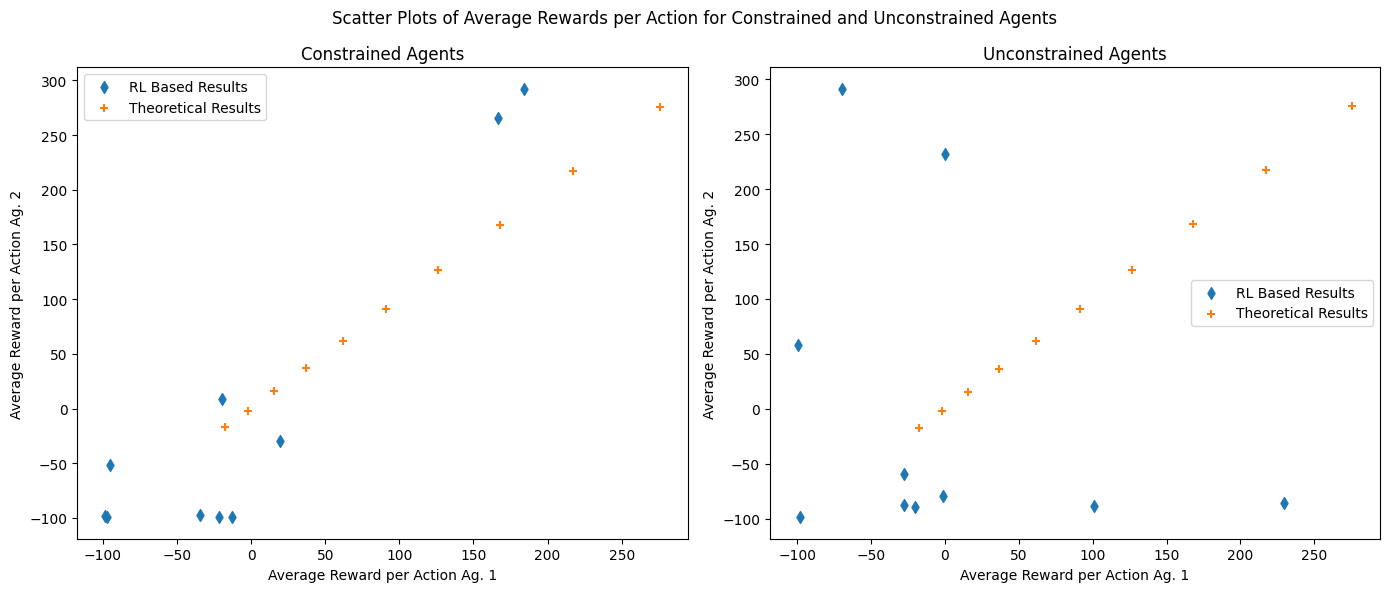

In [17]:
a = 1 # è per reward per ogni episodio -> plotta 10 punti che sono i reward medi per ogni azione di trade che l'agente fa
      # 0 per reward totale -> plotta 5000 punti che sono i reward medi per ogni agente in ogni episodio
if a == 1:

    # Load data for theoretical agents
    rewards_sch = dict(np.load('qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/re.npz', allow_pickle=True)) #qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps
    rewards_sch_0 = (rewards_sch['arr_0'][0].mean(a))
    rewards_sch_1 = (rewards_sch['arr_0'][0].mean(a))
    # Load data for constrained agents
    rewards_constrained = dict(np.load('qtp_multi_int_for_reward_study/cons/re.npz', allow_pickle=True))
    rewards_constrained_0 = (rewards_constrained['arr_0'][0].mean(a))
    rewards_constrained_1 = (rewards_constrained['arr_0'][1].mean(a))

    # Load data for unconstrained agents
    rewards_unconstrained = dict(np.load('qtp_multi_int_for_reward_study/unc/re.npz', allow_pickle=True))
    rewards_unconstrained_0 = (rewards_unconstrained['arr_0'][0].mean(a))
    rewards_unconstrained_1 = (rewards_unconstrained['arr_0'][1].mean(a))
else:
    
    # Load data for theoretical agents
    rewards_sch = dict(np.load('qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/re.npz', allow_pickle=True)) #qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps
    rewards_sch_0 = -(rewards_sch['arr_0'][0].mean(a))
    rewards_sch_1 = -(rewards_sch['arr_0'][0].mean(a))
    # Load data for constrained agents
    rewards_constrained = dict(np.load('qtp_multi_int_for_reward_study/cons/re.npz', allow_pickle=True))
    rewards_constrained_0 = -(rewards_constrained['arr_0'][0].mean(a))
    rewards_constrained_1 = -(rewards_constrained['arr_0'][1].mean(a))

    # Load data for unconstrained agents
    rewards_unconstrained = dict(np.load('qtp_multi_int_for_reward_study/unc/re.npz', allow_pickle=True))
    rewards_unconstrained_0 = -(rewards_unconstrained['arr_0'][0].mean(a))
    rewards_unconstrained_1 = -(rewards_unconstrained['arr_0'][1].mean(a))

# Create figure and subplots
plt.figure(figsize=(14, 6))

# Plot scatter plot for constrained agents
plt.subplot(1, 2, 1)
plt.scatter(rewards_constrained_0, rewards_constrained_1, label='RL Based Results', marker='d')
plt.scatter(rewards_sch_0, rewards_sch_1, label = 'Theoretical Results', marker = '+')
plt.xlabel('Average Reward per Action Ag. 1')
plt.ylabel('Average Reward per Action Ag. 2')
plt.title('Constrained Agents')
plt.legend()
#plt.xlim(-0.7, 5)  # Set x-axis limits
#plt.ylim(-0.7, 2.5)  # Set y-axis limits

# Plot scatter plot for unconstrained agents
plt.subplot(1, 2, 2)
plt.scatter(rewards_unconstrained_0, rewards_unconstrained_1, label='RL Based Results', marker='d')
plt.scatter(rewards_sch_0, rewards_sch_1, label = 'Theoretical Results', marker = '+')
plt.xlabel('Average Reward per Action Ag. 1')
plt.ylabel('Average Reward per Action Ag. 2')
plt.title('Unconstrained Agents')
plt.legend()
#plt.xlim(-0.7, 5)  # Set x-axis limits
#plt.ylim(-0.7, 2.5)  # Set y-axis limits
plt.suptitle('Scatter Plots of Average Rewards per Action for Constrained and Unconstrained Agents')

plt.tight_layout()
plt.show()